In [89]:
#librery
#visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#text processing
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

#embedding
from sklearn.feature_extraction.text import TfidfVectorizer
import scipy.sparse as sp
from gensim.models import Word2Vec

#model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB

#evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Importing dataset

In [90]:
dataset = pd.read_csv('data/youtoxic_english.csv')
dataset.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
dataset.info()
dataset.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   CommentId        1000 non-null   object
 1   VideoId          1000 non-null   object
 2   Text             1000 non-null   object
 3   IsToxic          1000 non-null   bool  
 4   IsAbusive        1000 non-null   bool  
 5   IsThreat         1000 non-null   bool  
 6   IsProvocative    1000 non-null   bool  
 7   IsObscene        1000 non-null   bool  
 8   IsHatespeech     1000 non-null   bool  
 9   IsRacist         1000 non-null   bool  
 10  IsNationalist    1000 non-null   bool  
 11  IsSexist         1000 non-null   bool  
 12  IsHomophobic     1000 non-null   bool  
 13  IsReligiousHate  1000 non-null   bool  
 14  IsRadicalism     1000 non-null   bool  
dtypes: bool(12), object(3)
memory usage: 35.3+ KB


,count,unique,top,freq
CommentId,1000,1000,Ugg2KwwX0V8-aXgCoAEC,1
VideoId,1000,13,9pr1oE34bIM,274
Text,1000,997,run them over,3
IsToxic,1000,2,False,538
IsAbusive,1000,2,False,647
IsThreat,1000,2,False,979
IsProvocative,1000,2,False,839
IsObscene,1000,2,False,900
IsHatespeech,1000,2,False,862
IsRacist,1000,2,False,875


In [92]:
dataset.isnull().sum()


CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64

In [93]:
dataset.drop('CommentId', axis=1, inplace=True)
dataset.head()


,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
df_bool = dataset.select_dtypes(include=['bool'])
for columna in df_bool.columns:
    dataset[columna] = dataset[columna].astype(int)
dataset.head()


,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,04kJtp6pVXI,If only people would just take a step back and...,0,0,0,0,0,0,0,0,0,0,0,0
1,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,1,1,0,0,0,0,0,0,0,0,0,0
2,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,1,1,0,0,1,0,0,0,0,0,0,0
3,04kJtp6pVXI,There are a very large number of people who do...,0,0,0,0,0,0,0,0,0,0,0,0
4,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",0,0,0,0,0,0,0,0,0,0,0,0


## Text Processing


In [95]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vitta\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [96]:
stop_words = set(stopwords.words('english'))

def text_processing(text):
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    text = re.sub(r'@\w+', '', text)
    text = text.lower()
    text = text.split()
    text = [word for word in text if word not in stop_words]
    clean_text = ' '.join(text)
    return clean_text

dataset['clean_text'] = dataset['Text'].apply(text_processing)
dataset.drop('Text', axis=1, inplace=True)
dataset.head()


,VideoId,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism,clean_text
0,04kJtp6pVXI,0,0,0,0,0,0,0,0,0,0,0,0,people would take step back make case anyone e...
1,04kJtp6pVXI,1,1,0,0,0,0,0,0,0,0,0,0,law enforcement trained shoot apprehend traine...
2,04kJtp6pVXI,1,1,0,0,1,0,0,0,0,0,0,0,dont reckon black lives matter banners held wh...
3,04kJtp6pVXI,0,0,0,0,0,0,0,0,0,0,0,0,large number people like police officers calle...
4,04kJtp6pVXI,0,0,0,0,0,0,0,0,0,0,0,0,arab dude absolutely right shot extra time sho...


In [97]:
dataset.to_csv('data/youtoxic_english_processed.csv', index=False)


In [98]:
#quitamos videoId
dataset.drop('VideoId', axis=1, inplace=True)

#Crear columan has_hate 
hate_columns = dataset.columns[:-1]  # Excluir 'clean_text'
dataset['has_hate'] = dataset[hate_columns].max(axis=1)

# Verificar la creación de la columna
dataset[['clean_text', 'has_hate']].head()

,clean_text,has_hate
0,people would take step back make case anyone e...,0
1,law enforcement trained shoot apprehend traine...,1
2,dont reckon black lives matter banners held wh...,1
3,large number people like police officers calle...,0
4,arab dude absolutely right shot extra time sho...,0


## Split dataset and Vectorize


In [99]:
#texto a vector
x_text = dataset['clean_text']

#metadatos
x_meta = dataset.drop(['clean_text', 'has_hate'], axis=1)

y = dataset['has_hate'] #etiqueta objetivo

#Dividimos texto y metadatos en conjuntos de entrenamiento y prueba
x_text_train, x_text_test, x_meta_train, x_meta_test, y_train, y_test = train_test_split(x_text, x_meta, y, test_size=0.2, random_state=42)

x_text_train.shape, x_text_test.shape, x_meta_train.shape, x_meta_test.shape, y_train.shape, y_test.shape

((800,), (200,), (800, 12), (200, 12), (800,), (200,))

In [100]:
#Vectorizar texto con TF-IDF
tfidf_vectorizer = TfidfVectorizer(
    max_features=3000,
    stop_words='english',
    min_df=5,
    max_df=0.7,
    ngram_range=(1,2)
)
x_text_train_tfidf = tfidf_vectorizer.fit_transform(x_text_train)
x_text_test_tfidf = tfidf_vectorizer.transform(x_text_test)

#combinar metadatos y texto vectorizado
x_train_combined = sp.hstack([x_meta_train, x_text_train_tfidf])
x_test_combined = sp.hstack([x_meta_test, x_text_test_tfidf])



## Model Training


Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0
Accuracy: 1.0


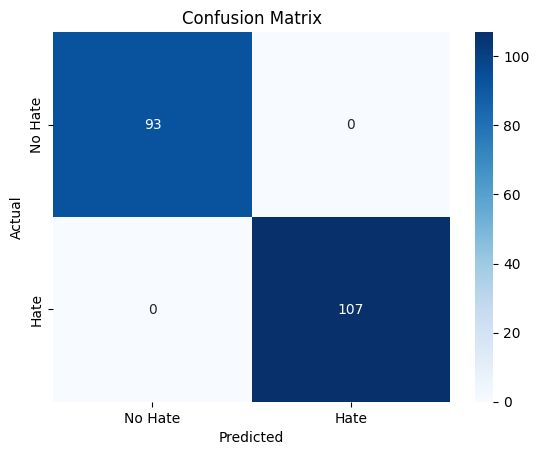

In [101]:
#Logistic Regression
model = LogisticRegression(C=0.1, penalty='l2', max_iter=1000)
model.fit(x_train_combined, y_train)

#Evaluar el modelo
y_pred = model.predict(x_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#random forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train_combined, y_train)

#evaluar el modelo
y_pred = model.predict(x_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#KNN
model = KNeighborsClassifier(n_neighbors=5)
model.fit(x_train_combined, y_train)

#evaluar el modelo
y_pred = model.predict(x_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#SVM
model = svm.SVC(kernel='linear')
model.fit(x_train_combined, y_train)

#evaluar el modelo
y_pred = model.predict(x_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

#comprobamos la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Hate', 'Hate'], yticklabels=['No Hate', 'Hate'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



In [103]:
from sklearn.linear_model import RidgeClassifier

model = RidgeClassifier()
model.fit(x_train_combined, y_train)

#evaluar el modelo
y_pred = model.predict(x_test_combined)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 1.0
